# **Project Name**    -  **AirBnb Booking Analysis**

##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member - 1** - Shivam Tiwari
##### **Team Member - 2** - Shivam Bharadwaj

# **Project Summary**

Hello, all. We have worked on the AirBnb Booking dataset of the year 2019. The dataset contains information of various hosts, their listings and the response of the users in terms of the number of reviews, when was the listing last reviewed etc.

We have tried to work on the data and get three things out of it:

a. We have tried to understand the user behaviour
b. We have tried to understand the hosts' behaviour
c. And most importantly, we have used those two to advice or suggest the stakeholders of AirBnb few points which when worked on will help drive the business in our humble opinion.

We hope that you like the project and we would like to listen to your thoughts on it. You can reach me at shivchirag1997@gmail.com



# **Github Link**

The official github link of the project is https://github.com/shivchirag/AirBnb_Booking_Analysis_EDA

# **Problem Statement**


AirBnb is a hotel and room rental service provider. We have been provided with the dataset of the business from the city of New York and it looks like the dataset is of 2019. The dataset has information on the users, the hosts and the listings.

Using the dataset, we can provide insights that helps the businesses in many ways. We can provide marketing guidelines and also help the stakeholders understand the behaviour of users and the hosts, thus helping drive the business.

#### **Define Your Business Objective?** 

***Understanding the user and host behaviour***

## ***1. Know the data***

### Import Libraries and the Dataset


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importing the dataset
dataset = pd.read_csv("/content/drive/MyDrive/Airbnb NYC 2019.csv")

In [4]:
# Generating a copy
df = dataset.copy()

### Dataset Overview

In [5]:
# First view of the dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
# No. of rows and columns
df.shape

(48895, 16)

In [7]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Duplicates and Null Values

In [8]:
# Duplicates in the dataset
len(df[df.duplicated()])

0

In [9]:
# Missing Values
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [10]:
# Checking the two numeric columns with null values
df[df['last_review'].isnull()]['number_of_reviews'].value_counts()
print()
df[df['reviews_per_month'].isnull()]['number_of_reviews'].value_counts()

0    10052
Name: number_of_reviews, dtype: int64

0    10052
Name: number_of_reviews, dtype: int64

In [11]:
# Making reviews per month 0 for datapoints with no reviews so far
df.reviews_per_month.fillna(0.0, inplace = True)

### What do we know now about the dataset?

The dataset is from the hotel and apartment rental booking site AirBnb. We have to use whatever we can from the dataset and provide insights on the user and the hosts' behaviour. These insights can then be used to make marketing strategies or other important decisions to increase the revenue or decrease the loss, if there is any.

We will focus mainly on the user behaviour side to try and understand what drives a consumer to leave a review and what doesn't. We may also look at anything we can to learn about the hosts.

The dataset has 48895 records and 16 columns. There are no duplicate values, but there are values missing in four of the 16 columns. We have fixed one of them though.

## ***2. Understanding the variables***



In [12]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,48895.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.090910,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.597283,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.040000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.370000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,1.580000,2.000000,227.000000


### Variables Description 

**id :** Unique ID

**name :** Name of the listing

**host_id :** Unique Host ID

**host_name :** Unique Host Name

**neighbourhood_group :** Location

**neighbourhood :** Area

**latitude :** Latitude of the listing

**longitude :** Longitude of the listing

**room_type :** Type of the listing

**price :** Price of the listing

**minimum_nights :** Minimum nights to be paid for

**number_of_reviews :** Total no of reviews received

**last_review :** Date of the latest review received

**reviews_per_month :** Reviews recieved per month

**calculated_hosts_listings_count :** Total listings by host

**availibility_365 :** Availibility around the year

In [14]:
# Check unique values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  id is 48895 .
No. of unique values in  name is 47905 .
No. of unique values in  host_id is 37457 .
No. of unique values in  host_name is 11452 .
No. of unique values in  neighbourhood_group is 5 .
No. of unique values in  neighbourhood is 221 .
No. of unique values in  latitude is 19048 .
No. of unique values in  longitude is 14718 .
No. of unique values in  room_type is 3 .
No. of unique values in  price is 674 .
No. of unique values in  minimum_nights is 109 .
No. of unique values in  number_of_reviews is 394 .
No. of unique values in  last_review is 1764 .
No. of unique values in  reviews_per_month is 938 .
No. of unique values in  calculated_host_listings_count is 47 .
No. of unique values in  availability_365 is 366 .


## 3. ***Data Wrangling***

In [15]:
# Deleting columns of no use to us
df.drop(['id','name','host_name'], axis = 1, inplace = True)

In [16]:
# Finding out the year of last review for each listing
df["last_review_year"] = pd.to_datetime(df.last_review).dt.strftime("%Y")

In [17]:
# Treating wrong values of column Price by substituting 0 with median price for that room type in that neighbourhood_group
# Calculating the median values for the data with 0s
brooklyn_private_price_median = np.median(df[(df['room_type']=="Private room") & (df['neighbourhood_group']=="Brooklyn")]['price'])
bronx_private_price_median = np.median(df[(df['room_type']=="Private room") & (df['neighbourhood_group']=="Bronx")]['price'])
brooklyn_EHA_price_median = np.median(df[(df['room_type']=="Entire home/apt") & (df['neighbourhood_group']=="Brooklyn")]['price'])
manhattan_EHA_price_median = np.median(df[(df['room_type']=="Entire home/apt") & (df['neighbourhood_group']=="Manhattan")]['price'])
brooklyn_shared_price_median = np.median(df[(df['room_type']=="Shared room") & (df['neighbourhood_group']=="Brooklyn")]['price'])

In [18]:
# Replacing 0s in prices
df['price'] = np.where((df['price']==0) & (df['neighbourhood_group']=='Brooklyn') & (df['room_type']=='Private room'), brooklyn_private_price_median, df['price'])
df['price'] = np.where((df['price']==0) & (df['neighbourhood_group']=='Bronx') & (df['room_type']=='Private room'), bronx_private_price_median, df['price'])
df['price'] = np.where((df['price']==0) & (df['neighbourhood_group']=='Brooklyn') & (df['room_type']=='Entire home/apt'), brooklyn_EHA_price_median, df['price'])
df['price'] = np.where((df['price']==0) & (df['neighbourhood_group']=='Manhattan') & (df['room_type']=='Entire home/apt'), manhattan_EHA_price_median, df['price'])
df['price'] = np.where((df['price']==0) & (df['neighbourhood_group']=='Brooklyn') & (df['room_type']=='Shared room'), brooklyn_shared_price_median, df['price'])

In [19]:
# Segregating values for each neighbourhood_group
df_Manhattan = df[df['neighbourhood_group']=="Manhattan"]
df_Brooklyn = df[df['neighbourhood_group']=="Brooklyn"]
df_Queens = df[df['neighbourhood_group']=="Queens"]
df_Bronx = df[df['neighbourhood_group']=="Bronx"]
df_StatenIsland = df[df['neighbourhood_group']=="Staten Island"]

In [20]:
# Segregating the dataset for each room type
df_Shared = df[df['room_type']=='Shared room']
df_Private = df[df['room_type']=='Private room']
df_EHA = df[df['room_type']=='Entire home/apt']

### Manipulations done in the Data Wrangling section:


We have removed the columns id, name and host_name as we firmly believe we won't need them in our analysis.

We have also replaced the 0 values in the price columns. To be as specific as we could, we used the median values for the room_type and the neighbourhood_group of every row that had price 0.

We have divided the data as per the room_type column to ensure we have the right kind of data when we begin with our visualisation process.

Finally, we have made a new column last_review_year. We believe this might help us know more about user behaviours of certain areas.

## ***4. Understanding the relationships between variables using different kinds of visualisation techniques:***

####Basic understanding of the data's linear relationships:

In [21]:
# Getting the numerical variables
corr_data = df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]

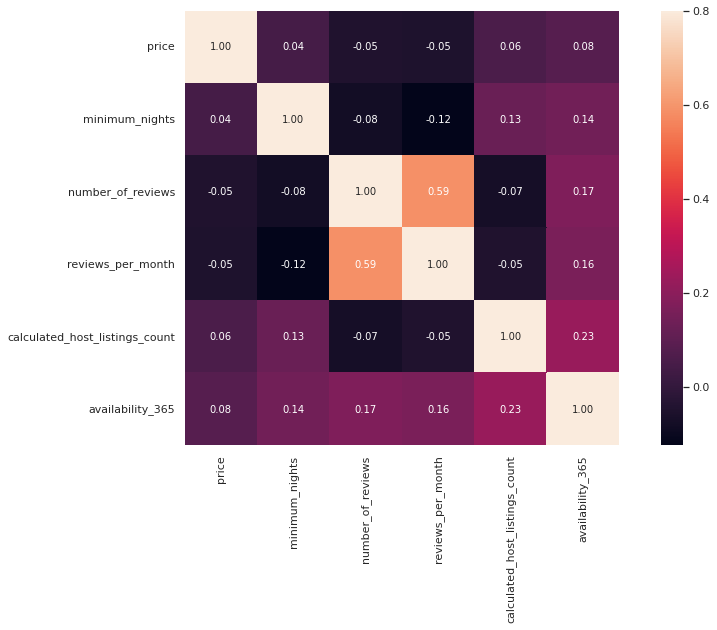

In [22]:
# Heatmap
corrmat = corr_data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corrmat,annot=True,fmt='.2f',annot_kws={'size':10},vmax=.8,square=True);

#####Why heatmap?

It helps understand the linear relationship between any two numerical variables of a dataset. And it is beautiful.

#####Insights from the chart?

From the overlook, there seems to be no relationship between any two variables of the dataset except for the very obvious one (number of reviews and reviews per month).

#####How does the insight help?

Now we know that we can't expect any linear kind of relationship between two numerical variables of our problem.

####4.1 How many listings received their last review in which year?


In [23]:
# Value counts of Last Review Year column
bar_data = df.last_review_year.value_counts(dropna=False).reset_index().rename(columns={'index':'Year','last_review_year':'No of reviews'})
# Replacing Nan values with the string Nan for visualisation
bar_data.fillna("Nan", inplace=True)
bar_data

,Year,No of reviews
0,2019,25209
1,Nan,10052
2,2018,6050
3,2017,3205
4,2016,2707
5,2015,1393
6,2014,199
7,2013,48
8,2012,25
9,2011,7


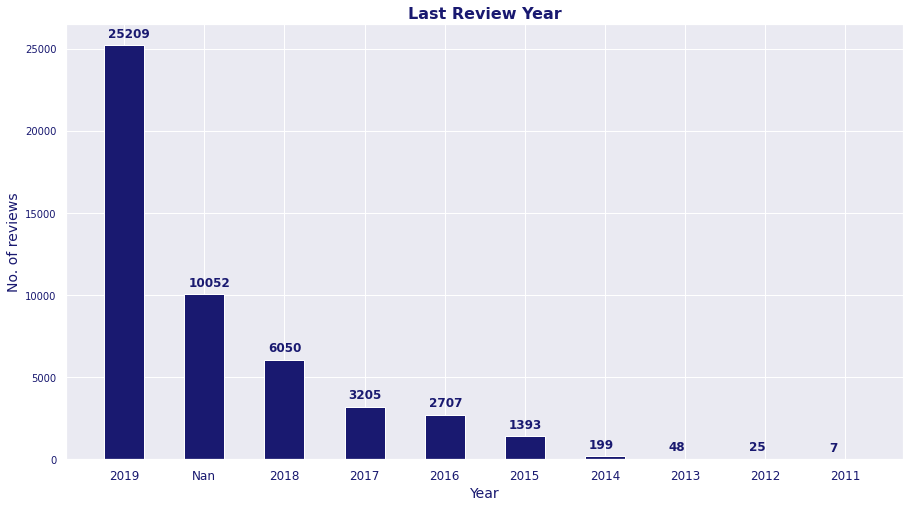

In [24]:
# Setting the size
plt.figure(figsize=(15,8))
plt.bar(bar_data["Year"], bar_data["No of reviews"], color="midnightblue", width=0.5)
# Title for the graph
plt.title("Last Review Year", fontsize=16, color="midnightblue", fontweight="bold")
# The markings on the axes
plt.xticks(fontsize=12, color="midnightblue")
plt.yticks(fontsize=10, color="midnightblue")
# Labels for the axes
plt.ylabel("No. of reviews", fontsize=14, color="midnightblue")
plt.xlabel("Year", fontsize=14, color="midnightblue")
# Adding annotations on the graph
for i in range(len(bar_data["Year"])):
    plt.annotate(bar_data["No of reviews"][i], 
                 (i-0.2, bar_data["No of reviews"][i] + 500), 
                 color="midnightblue", fontweight="bold", fontsize=12)
plt.show();

#####Why bar chart?

Because it is easier to display the information using a bar chart when you have far too many categories for a pie chart. If we were to use pie chart here, the information could have been cluttered and difficult to read, especially because of the skewed nature of the categories.

#####Insights from the chart?

We see that 10052 i.e. 20.5% of the listings are yet to receive a review and that 25209 i.e. only 51.55% of the listings have received a review in the year 2019, the supposed year of the dataset. 

The rest of the listings in the dataset have received their last review in the previous years.



#####How the insights help us?

From the given dataset, reviews are perhaps the most obvious way of defining user behaviour. And anyway, a business like AirBnb will always need feedbacks on the listings from the consumers. 

This way the hosts will understand what works and what doesn't for the rooms and they thus with the knowledge make the experience better.

So, reviews are key and only about half of the listings getting reviews is very low. Users should be incentivized in some manner to leave reviews and feedbacks to help the service provider maintain the standards.

####4.2 What is the distribution of the room types?


In [25]:
# Value counts of the room type column
pie_data = df.room_type.value_counts(normalize=True)*100
pie_data = pie_data.reset_index().rename(columns={'index':'room_type','room_type':'% share'})
pie_data

,room_type,% share
0,Entire home/apt,51.966459
1,Private room,45.661111
2,Shared room,2.372431


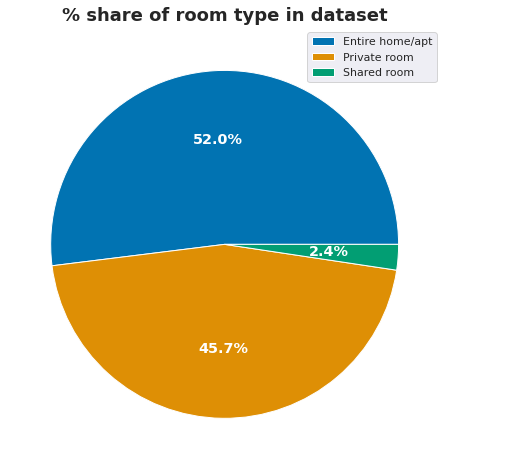

In [26]:
# Using colorblind palette for pie chart
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['% share'],
        labels = pie_data['room_type'].values,
        autopct = "%.1f%%", # % values in 1 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"}) # styling the text
plt.legend()
# Giving our chart a suitable title
plt.title("% share of room type in dataset", fontweight = "bold", fontsize = 18)
plt.show();

#####Why pie chart?

The pie chart is a pretty straightforward way to show the distribution of the data among smaller number of categories, especially when the individual % share of the categories are not very small in numbers.

#####Insights from the chart?

The most common type of rooms available are apartments that are fully available on rent. These are a bit expensive than the other two categories and account for 52.0% of the listings.

The next most common type of listings is the private room type. Here, a room from an apartment or a home is available for use to an individual. This kind of rooms account for 45.7% of the listings. They are cheaper options and also interest those who don't travel in large groups.

Shared rooms are available as well and are perhaps the cheapest options where individuals can book rooms that other will also be using. These account for 2.4% of the data.

#####How does the insights help?

Now we know that there aren't enough shared room listings. It should be looked at why so. Is it because the demand isn't so much or is it a sector that has been so far overlooked by the AirBnb team. If it turns out to be the later, hosts can be incentivized and encouraged to add such more listings.

####4.3 What are the price ranges for the three room types?

In [27]:
# Preparing the data
temp = pd.concat([df_EHA['price'].describe(),df_Private['price'].describe(),df_Shared['price'].describe()], axis=1)
temp.reset_index(inplace=True)
temp.columns = ['stat','EHA','Private','Shared']
# Not including the distribution post 75% since two of the three room types have high volume of outliers
line_data = temp.iloc[3:7,:] 
line_data

,stat,EHA,Private,Shared
3,min,10.0,10.0,10.0
4,25%,120.0,50.0,33.0
5,50%,160.0,70.0,45.0
6,75%,229.0,95.0,75.0


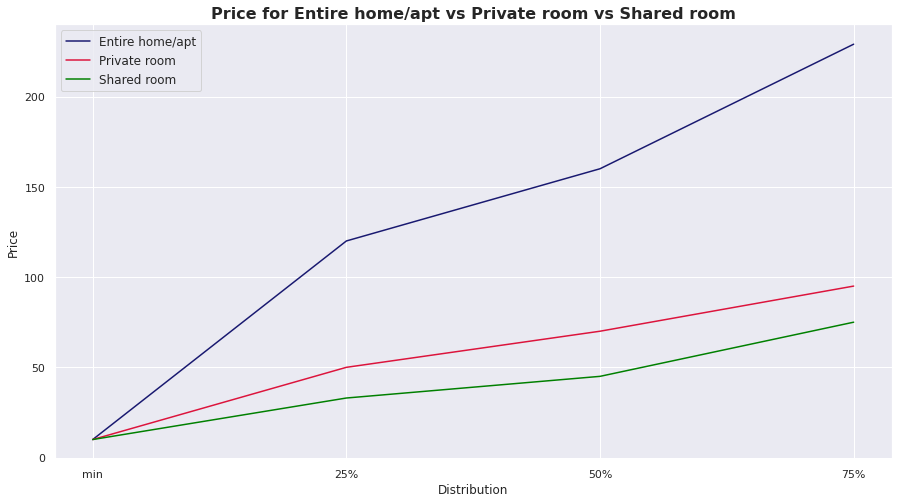

In [28]:
# Setting the size of the figure
plt.figure(figsize = (15,8))
# Plotting the lines
plt.plot(line_data.stat, line_data.EHA, color = "midnightblue")
plt.plot(line_data.stat, line_data.Private, color = "crimson")
plt.plot(line_data.stat, line_data.Shared, color = "green")
# Assigning the labels
plt.ylabel("Price")
plt.xlabel("Distribution")
# Adding labels
labels = ['Entire home/apt','Private room','Shared room']
plt.legend(labels = labels, fontsize = "large")
plt.title("Price for Entire home/apt vs Private room vs Shared room", fontsize = 16, fontweight = "bold")
plt.show();

##### Why line graph?


Line graphs are the best possible choice to explain the distribution of the prices for the three kinds of rooms. This is because, as aforementioned, two of the three room types have high volume of outliers when it comes to the prices of the rooms. A violin plot or a boxplot would thus not be able to entirely paint the picture here.

#####Insights from the chart?

It was pretty easy to guess which of the three would have been the most affordable and the most expensive options. However, it was difficult to tell how much exactly the prices differed for the three kinds.

All the three have the cheapest options starting from $10. However, the rise in the price for an entire home or apartment is very considerable. Whereas, there is very little difference between the prices of the other two types, even as we move towards the higher end of the pay. 

More than 75% of the rooms for the private and shared ones cost lesser than $100 whereas the price doubles at the 75th percentile for entire rooms and apartments.

#####How does the insight helps?

We already knew that the shared room types are the cheapest options but now we can quantify how cheap the prices can expected to be. A shared room is anywhere between 20-50% cheaper option.

We also know how much expensive the entire rooms are. A customer will have to pay atleast twice as much as he would ideally pay for getting a private or a shared room to get an apartment or home.

So, the visualisation tells us about the consumer's spending power.

####4.4 Which type of rooms get the most reviews on average?

In [29]:
# Using group by on room type to get median of reviews per month
bar_data = df.groupby(['room_type']).agg({'reviews_per_month':'median'}).reset_index() #median because data has too many outliers
bar_data

,room_type,reviews_per_month
0,Entire home/apt,0.350
1,Private room,0.400
2,Shared room,0.405


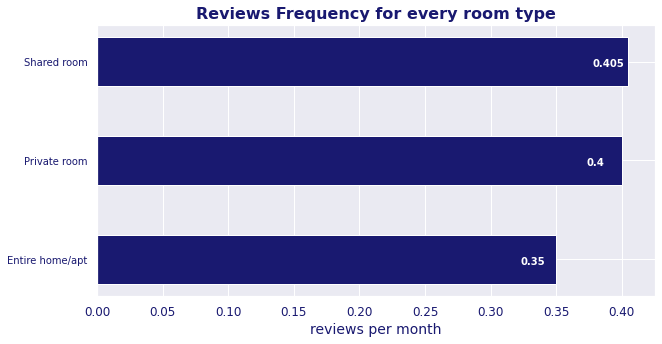

In [30]:
plt.figure(figsize=(10,5))
plt.barh(y=bar_data['room_type'],
         width=bar_data['reviews_per_month'], color="midnightblue", height=0.5)
plt.title("Reviews Frequency for every room type", fontsize=16, color="midnightblue", fontweight="bold")
plt.xticks(fontsize=12, color="midnightblue")
plt.yticks(fontsize=10, color="midnightblue")
plt.xlabel("reviews per month", fontsize=14, color="midnightblue")
# Annotations on the bar
for i in range(len(bar_data['room_type'])):
    plt.annotate(bar_data['reviews_per_month'][i], 
                 (bar_data['reviews_per_month'][i] - .027, -0.05+i), 
                 color="white", fontweight="bold")
plt.show();

#####Why horizontal bar?

Horizontal bars help identify the small differences between values for the different categories, like we have in between Shared room and Private room.

#####Insights from the chart?

We can see that the shared rooms get reviews more frequently than the two more expensive types. 

Actually, private rooms are reviewed almost as frequently as the shared rooms. 

#####How does the insight help?

The cheaper rooms will always have the biggest crowd if they have all the basic necessities made available. This betters the user experience and since the users already review such rooms more frequently, there will be more positive feedbacks for the listings and thus AirBnb.

####4.5 Which room_type is available to book most of the times on average?




In [31]:
# Using group by on room type to get median of availability_365
bar_data = df.groupby(['room_type']).agg({'availability_365':'median'}).reset_index() #median because data has too many outliers
bar_data

,room_type,availability_365
0,Entire home/apt,42.0
1,Private room,45.0
2,Shared room,90.0


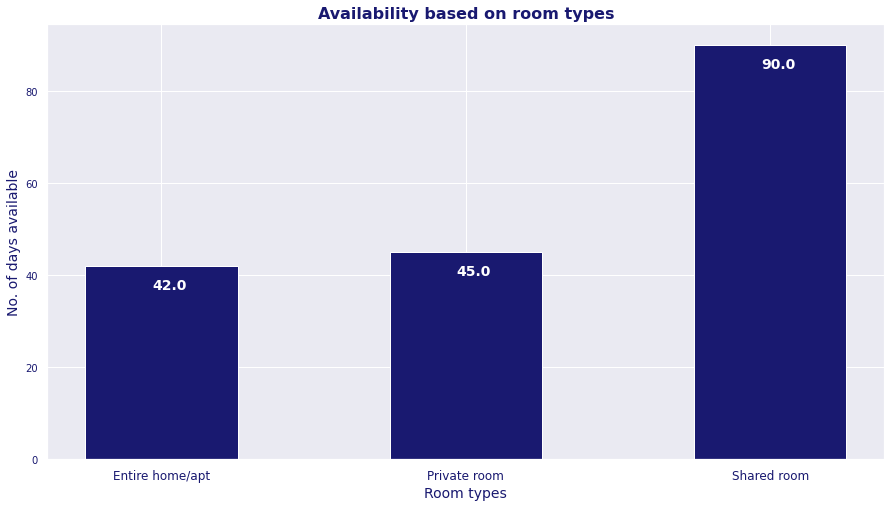

In [32]:
# Setting the size
plt.figure(figsize=(15,8))
plt.bar(bar_data["room_type"], bar_data["availability_365"], color="midnightblue", width=0.5)
# Title for the graph
plt.title("Availability based on room types", fontsize=16, color="midnightblue", fontweight="bold")
# The markings on the axes
plt.xticks(fontsize=12, color="midnightblue")
plt.yticks(fontsize=10, color="midnightblue")
# Labels for the axes
plt.ylabel("No. of days available", fontsize=14, color="midnightblue")
plt.xlabel("Room types", fontsize=14, color="midnightblue")
# Adding annotations on the graph
for i in range(len(bar_data["room_type"])):
    plt.annotate(bar_data["availability_365"][i], 
                 (i-0.03, bar_data["availability_365"][i] - 5), 
                 color="white", fontweight="bold", fontsize=14)
plt.show();

#####Why bar chart?

Because it is easier to display the information using a bar chart when you have far too many categories for a pie chart. If we were to use pie chart here, the information could have been cluttered and difficult to read, especially because of the skewed nature of the categories.

#####Insights from the chart?

Shared rooms are more available (90 days) whereas entire homes or apartments and private rooms have almost similar availability (42-45 days).

#####How does the insight help?

Marketing campaigns to create awareness about the easy availability and easy affordability can be created to inform the consumers about the shared rooms where we have already established the fact that there is a big room for growth.

####4.6 What is the distribution of the minimum booking days necessary for the different kinds of room types?

In [33]:
# Preparing the data
temp = pd.concat([df_EHA['minimum_nights'].describe(),df_Private['minimum_nights'].describe(),df_Shared['minimum_nights'].describe()], axis=1)
temp.reset_index(inplace=True)
temp.columns = ['stat','EHA','Private','Shared']
# Not including the distribution post 75% since two of the three room types have high volume of outliers
line_data = temp.iloc[3:7,:] 
line_data

,stat,EHA,Private,Shared
3,min,1.0,1.0,1.0
4,25%,2.0,1.0,1.0
5,50%,3.0,2.0,1.0
6,75%,5.0,4.0,3.0


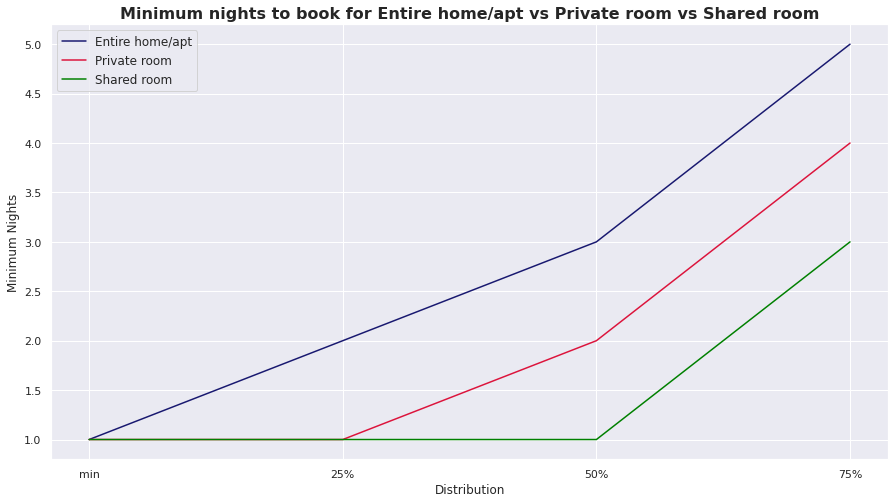

In [34]:
# Setting the size of the figure
plt.figure(figsize = (15,8))
# Plotting the lines
plt.plot(line_data.stat, line_data.EHA, color = "midnightblue")
plt.plot(line_data.stat, line_data.Private, color = "crimson")
plt.plot(line_data.stat, line_data.Shared, color = "green")
# Assigning the labels
plt.ylabel("Minimum Nights")
plt.xlabel("Distribution")
# Adding labels
labels = ['Entire home/apt','Private room','Shared room']
plt.legend(labels = labels, fontsize = "large")
plt.title("Minimum nights to book for Entire home/apt vs Private room vs Shared room", fontsize = 16, fontweight = "bold")
plt.show();

#####Why line graph?

Line graphs, as explained earlier, are best suited for us to show the distribution of the three kinds where there are a lot of outliers in the dataset.

#####Insights from the chart?

More than half of the shared room listings can be booked just for a day and then the other half see the growth in the number of minimum days of bookings required at the same rate as the other two room types.

Entire Rooms have consistent growth and are expected to be booked usually for days than the other two room types.

And the private rooms see almost similar growth as entire rooms in the later 75 percentile of listings before seeing none in the first quantile.

#####How does the insight help?

Another stat that now tells us a lot about the room types and the hosts behaviour. Booking entire homes doesn't only need more money but a committment of more days as well. However, half of the shared rooms have almost no committments.

####4.7 Which are the most popular neighbourhood groups in terms of listings?

In [35]:
pie_data = df.neighbourhood_group.value_counts(normalize=True)*100
pie_data = pie_data.reset_index().rename(columns={'index':'neighbourhood_group','neighbourhood_group':'% share'})
pie_data

,neighbourhood_group,% share
0,Manhattan,44.301053
1,Brooklyn,41.116679
2,Queens,11.588097
3,Bronx,2.231312
4,Staten Island,0.762859


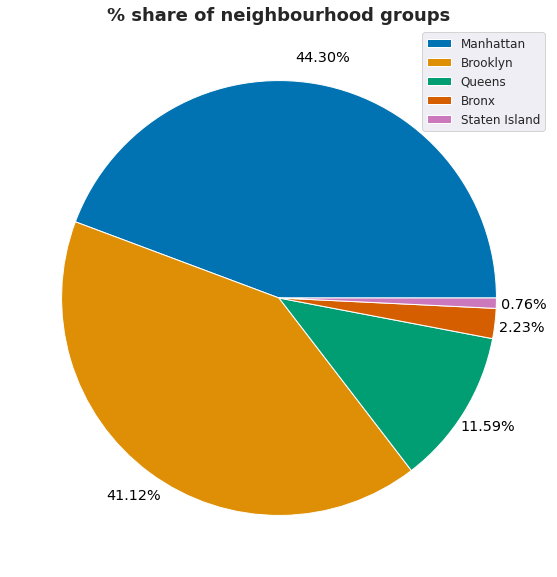

In [36]:
# Using colorblind palette for pie chart
plt.figure(figsize=(15,10))
plt.pie(pie_data['% share'],
        pctdistance = 1.125,
        autopct = "%.2f%%",
        textprops = {"size":"x-large",
                     "color":"black"})
plt.legend(labels = pie_data['neighbourhood_group'].values, loc='upper right', fontsize=12)
# Giving our chart a suitable title
plt.title("% share of neighbourhood groups", fontweight = "bold", fontsize = 18)
plt.show();

#####Why pie chart?

Bars fail when the difference between the two extremes in terms of % share is too big and thus we have to use pie chart here.

#####Insights from the chart?

Manhattan and Brooklyn comprise almost 85% of the listings of New York on AirBnb. Whereas Bronx and Staten Island (the largest of the five neighbourhood groups) lack presence and account for only about 3% combined. 

#####How does the insight help?

It helps a company to know where its user base is from and where it is not doing well. When the largest neighbourhood group in terms of area of the five has the lowest number of listings, AirBnb needs to acquire most listings from over there.

In [37]:
# Distribution by room types
bar_data=df.groupby(['neighbourhood_group','room_type']).agg({'room_type':'count'}).rename(columns={'room_type':'no_of_listings'}).reset_index()
bar_data

,neighbourhood_group,room_type,no_of_listings
0,Bronx,Entire home/apt,379
1,Bronx,Private room,652
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,9559
4,Brooklyn,Private room,10132
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Entire home/apt,2096


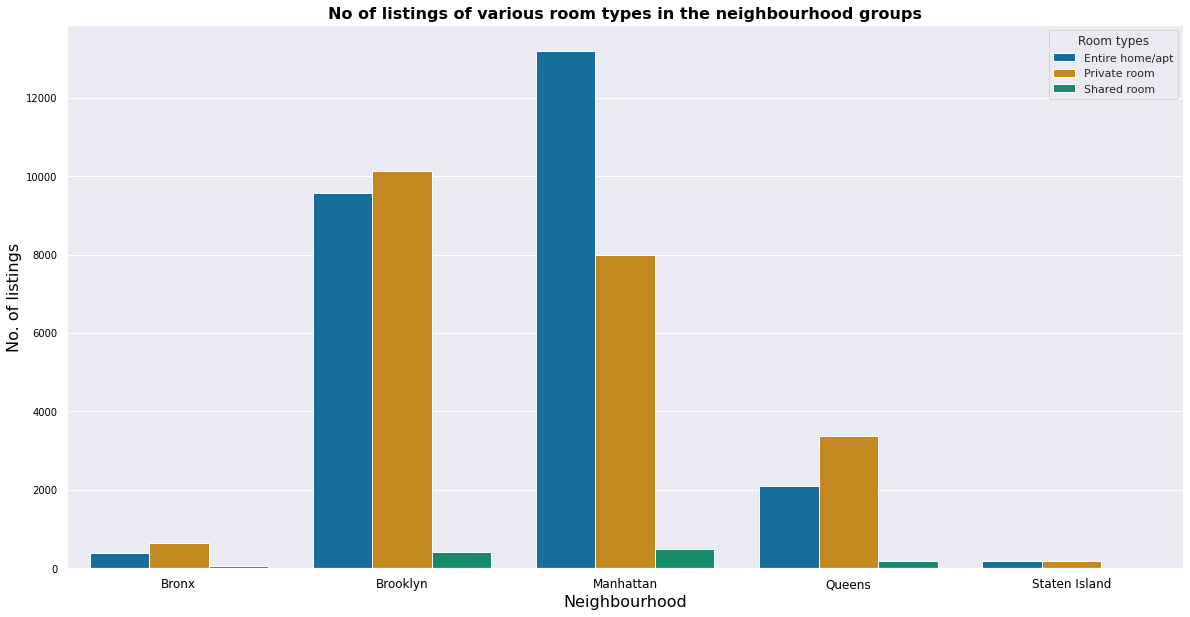

In [38]:
# Plotting the bar multivariate graph
sns.set_palette('colorblind')
plt.figure(figsize=(20,10))
sns.barplot(data=bar_data, x='neighbourhood_group', y ='no_of_listings', hue='room_type')
# Title for the graph
plt.title("No of listings of various room types in the neighbourhood groups", fontsize=16, color="black", fontweight="bold")
# The markings on the axes
plt.xticks(fontsize=12, color="black")
plt.yticks(fontsize=10, color="black")
# Labels for the axes
plt.ylabel("No. of listings", fontsize=16, color="black")
plt.xlabel("Neighbourhood", fontsize=16, color="black")
plt.legend(title="Room types")
plt.show();

#####Why bar chart?

We can see that the bar chart helps us understand the difference in the numbers so clearly here. It is what made us go for it.

#####Insights from the chart?

Apart from Manhattan, the rest of the neighbourhood groups have more private room listings than entire room/apartment listings.



#####How does the insight help?

It gives us an idea of what the users want and what the hosts provide. The most interesting point for the stakeholders should be looking into what makes the users get entire apartments rather than a private room even though the former are much more expensive.

####4.8 Which are the 10 most popular neighbourhood in terms of listings?



In [39]:
# Preparing the data by grouping by neighbourhood group and neighbourhood and then extracting the top 10 listings by count
bar_data = df.groupby(['neighbourhood_group','neighbourhood']).agg({'neighbourhood':'count'}).rename(columns={'neighbourhood':'no_of_listings'}).reset_index().sort_values('no_of_listings',ascending=False).head(10)
bar_data

,neighbourhood_group,neighbourhood,no_of_listings
93,Brooklyn,Williamsburg,3920
50,Brooklyn,Bedford-Stuyvesant,3714
105,Manhattan,Harlem,2658
58,Brooklyn,Bushwick,2465
124,Manhattan,Upper West Side,1971
106,Manhattan,Hell's Kitchen,1958
100,Manhattan,East Village,1853
123,Manhattan,Upper East Side,1798
65,Brooklyn,Crown Heights,1564
112,Manhattan,Midtown,1545


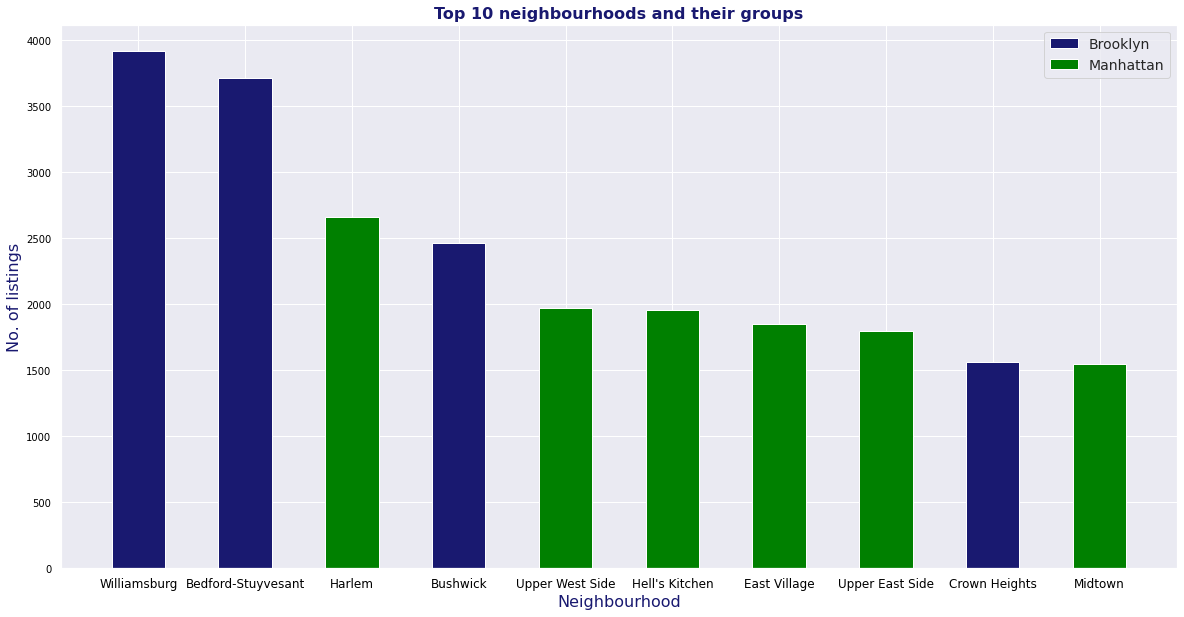

In [40]:
# Setting the size
colors = {'Brooklyn':'midnightblue','Manhattan':'green'}
plt.figure(figsize=(20,10))
plt.bar(bar_data["neighbourhood"], bar_data["no_of_listings"], color=bar_data['neighbourhood_group'].replace(colors), width=0.5)
# Title for the graph
plt.title("Top 10 neighbourhoods and their groups", fontsize=16, color="midnightblue", fontweight="bold")
# The markings on the axes
plt.xticks(fontsize=12, color="black")
plt.yticks(fontsize=10, color="black")
# Labels for the axes
plt.ylabel("No. of listings", fontsize=16, color="midnightblue")
plt.xlabel("Neighbourhood", fontsize=16, color="midnightblue")
# Adding legends using Patch
from matplotlib.patches import Patch
plt.legend([Patch(facecolor=colors['Brooklyn']),Patch(facecolor=colors['Manhattan'])],["Brooklyn","Manhattan"], fontsize = 14)
plt.show();

#####Why bar chart?

There is no other chart that depicts the rankings in a better and more easier-to-understand way than a bar graph.

#####Insights from the chart?

As expected, the top 10 listings are from the two most popular neighbourhood groups, Brooklyn and Manhattan. And surprisingly, they account for 47.95% of the total listings of the dataset.

#####How does the insight help?

The insights inform us about the ten most popular neighbourhoods of New York in terms of host listings. Now this may very well be because of high demands of accomodations in these neighbourhoods. 

####4.9 How does the price vary with the number of reviews per month?

In [41]:
# Preparing the data
temp = df[['price', 'number_of_reviews']]
# Removing the outliers to have a closer look at the patterns
scatter_data = temp[(temp['price']<500)&(temp['number_of_reviews']<250)]
scatter_data

,price,number_of_reviews
0,149.0,9
1,225.0,45
2,150.0,0
4,80.0,9
5,200.0,74
...,...,...
48890,70.0,0
48891,40.0,0
48892,115.0,0
48893,55.0,0


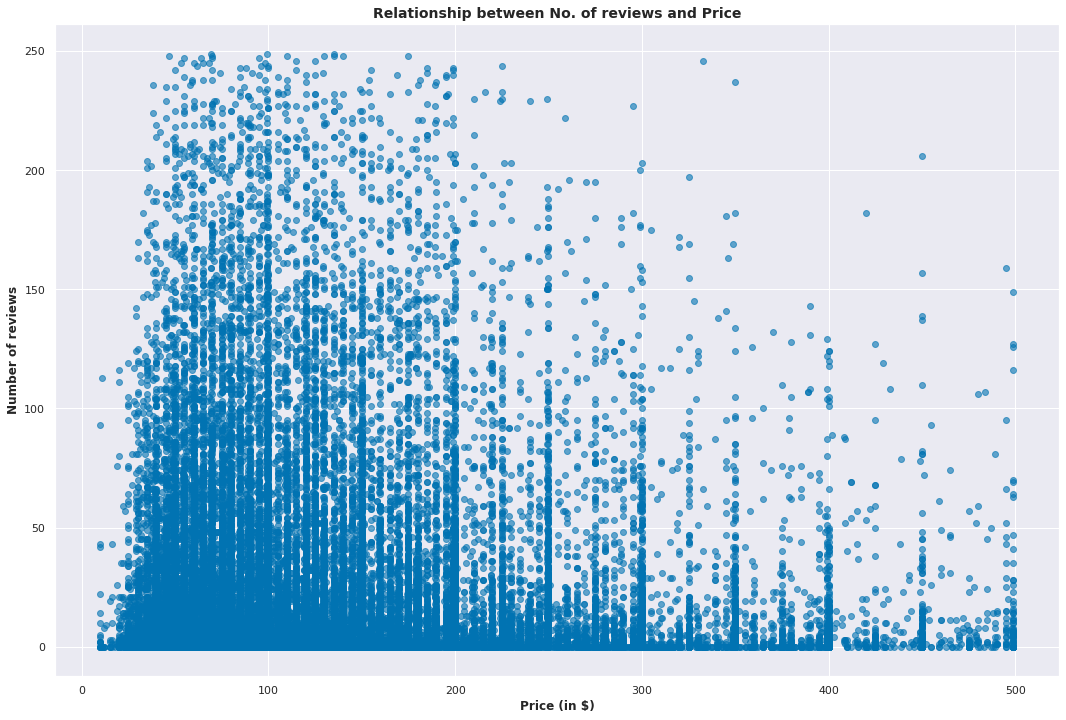

In [42]:
plt.figure(figsize = (18,12))
# Plotting the scatter plot
scatter = plt.scatter(scatter_data['price'],
            scatter_data['number_of_reviews'],
            alpha = 0.6)
plt.title("Relationship between No. of reviews and Price",
          fontsize = 14,
          weight = "bold")
plt.xlabel("Price (in $)", weight = "bold")
plt.ylabel("Number of reviews", weight = "bold")
plt.show();

#####Why scatter plot?

Scatter plot tells the relationship between two numerical variables in ways no other plots can. It is the best way to see if there is any kind of underlying relationship between two variables.

#####Insights from the plot?

It is easy to tell by looking at the graph that there is no relation between the price and the number of reviews of a listing.

#####How does the insight help?

The chart ensures that there will be no idea of a relationship between the price and the number of reviews a listing recieves in the minds of the decision makers.

More luxurious rooms don't mean the place is going to be reviewed more oftenly. Or that more affordable listings will get more feedbacks. The price doesn't have a say in the user's motive to review a place.

####4.10 Do hosts with more listings have higher reviews rate?

In [43]:
# Preparing the data
temp = df[['calculated_host_listings_count', 'reviews_per_month']]
# Removing the outliers to have a closer look at the patterns
scatter_data = temp[(temp['reviews_per_month']<15)&(temp['calculated_host_listings_count']<60)]
scatter_data

,calculated_host_listings_count,reviews_per_month
0,6,0.21
1,2,0.38
2,1,0.00
3,1,4.64
4,1,0.10
...,...,...
48890,2,0.00
48891,2,0.00
48892,1,0.00
48893,6,0.00


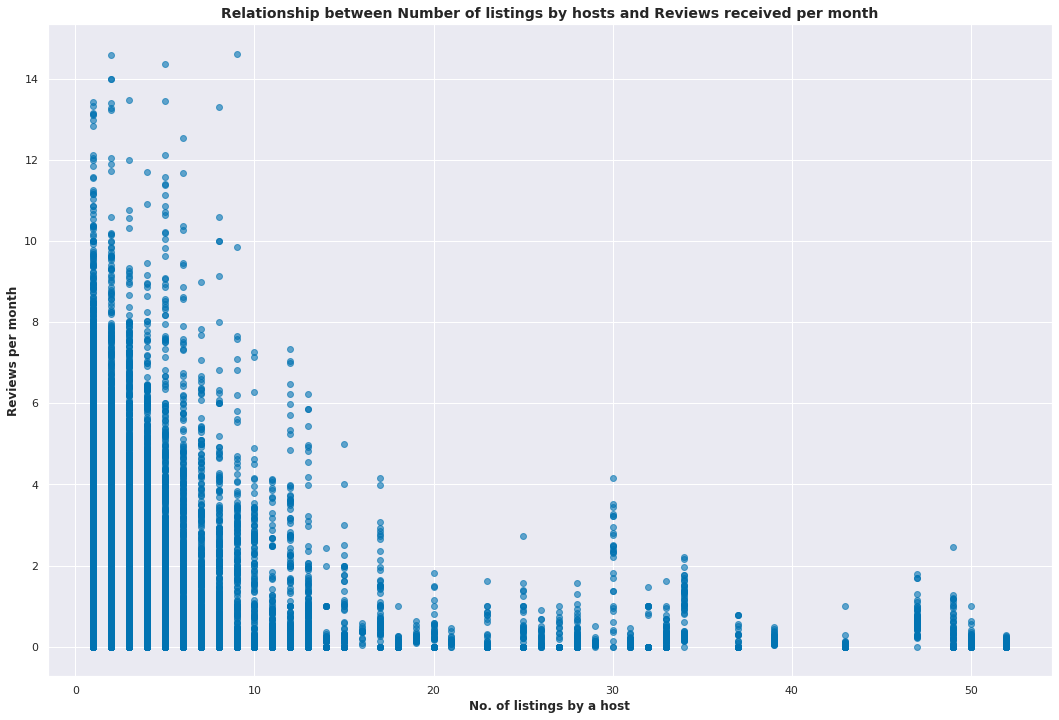

In [44]:
plt.figure(figsize = (18,12))
# Plotting the scatter plot
scatter = plt.scatter(scatter_data['calculated_host_listings_count'],
            scatter_data['reviews_per_month'],
            alpha = 0.6)
plt.title("Relationship between Number of listings by hosts and Reviews received per month",
          fontsize = 14,
          weight = "bold")
plt.xlabel("No. of listings by a host", weight = "bold")
plt.ylabel("Reviews per month", weight = "bold")
plt.show();

In [45]:
scatter_data.corr()

,calculated_host_listings_count,reviews_per_month
calculated_host_listings_count,1.000000,-0.042941
reviews_per_month,-0.042941,1.000000


So, the corr method confirms what the visualisation was suggesting i.e. there is not necessarily a strong relation between the number of listings by a host and the number of reviews his listings get every month.


#####Why scatter plot?

Scatter plot helps understand the relations better between two numerical variables.

#####Insights from the chart?

There is no relationship between the total number of listings by a host and the number of reviews his listing gets every month on average. 

#####How does the insight help?

It tells that the hosts with more listings are not doing anything differently to drive the number of reviews their listings are getting. However, getting reviewed frequently and positively helps hosts build trust and acquire more users.

Hosts can certainly be adviced to do better to get reviewed by users.

####4.11 How the price varies between the different neighbourhood groups for the three types of rooms?

In [46]:
# Preparing the dataset
bar_data = df.groupby(['neighbourhood_group', 'room_type'], as_index=False)['price'].median()
bar_data

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,100.00
1,Bronx,Private room,53.75
2,Bronx,Shared room,40.00
3,Brooklyn,Entire home/apt,145.00
4,Brooklyn,Private room,65.00
5,Brooklyn,Shared room,36.00
6,Manhattan,Entire home/apt,191.00
7,Manhattan,Private room,90.00
8,Manhattan,Shared room,69.00
9,Queens,Entire home/apt,120.00


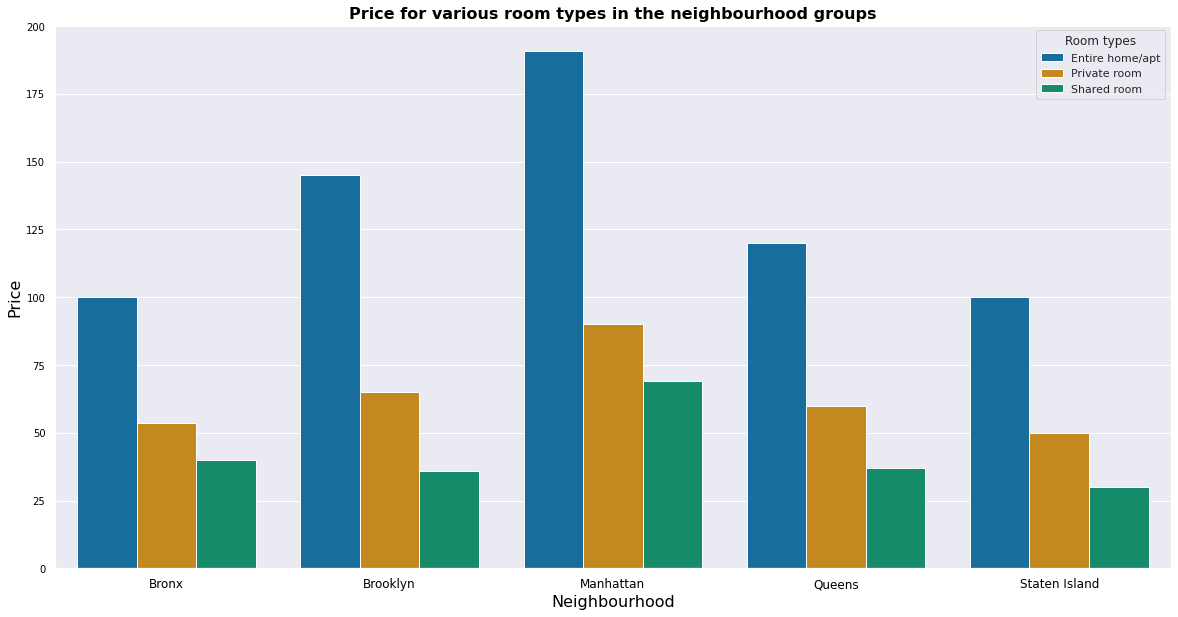

In [47]:
# Plotting the bar multivariate graph
sns.set_palette('colorblind')
plt.figure(figsize=(20,10))
sns.barplot(data=bar_data, x='neighbourhood_group', y ='price', hue='room_type')
# Title for the graph
plt.title("Price for various room types in the neighbourhood groups", fontsize=16, color="black", fontweight="bold")
# The markings on the axes
plt.xticks(fontsize=12, color="black")
plt.yticks(fontsize=10, color="black")
# Labels for the axes
plt.ylabel("Price", fontsize=16, color="black")
plt.xlabel("Neighbourhood", fontsize=16, color="black")
plt.legend(title="Room types")
plt.show();

#####Why bar graph?

Bar graph are one of the easiest understood graph kinds, especially for our kind of data.

#####Insight from the chart?

Manhattan is the most expensive neighbourhood group whereas Bronx and Staten Island have almost similar costs and are the cheapest.

Manhattan is so expensive that getting a private room there is as expensive as getting an entire home/apt in Staten Island and Bronx.

The price of getting a private room is almost same for all the neighbourhood groups but Manhattan.

#####How does the insight help?

The insight will help understand which kind of user should be shown what type of room when looking for one in a certain neighbourhood group.

A user who usually gets a private room when in Manhattan to save money could be swayed towards getting an entire home/apt in neighbourhood groups such as Staten Island and Bronx. This way, the user will have a better experience at the same cost at which he would get lesser in Manhattan. This way such insights can be used to have a positive impact on a user.

####4.12 How does the availability of the rooms vary depending on the price?



In [48]:
temp = df[['availability_365','price']]
scatter_data = temp[temp['price']<500] #Removing the outliers
scatter_data

,availability_365,price
0,365,149.0
1,355,225.0
2,365,150.0
3,194,89.0
4,0,80.0
...,...,...
48890,9,70.0
48891,36,40.0
48892,27,115.0
48893,2,55.0


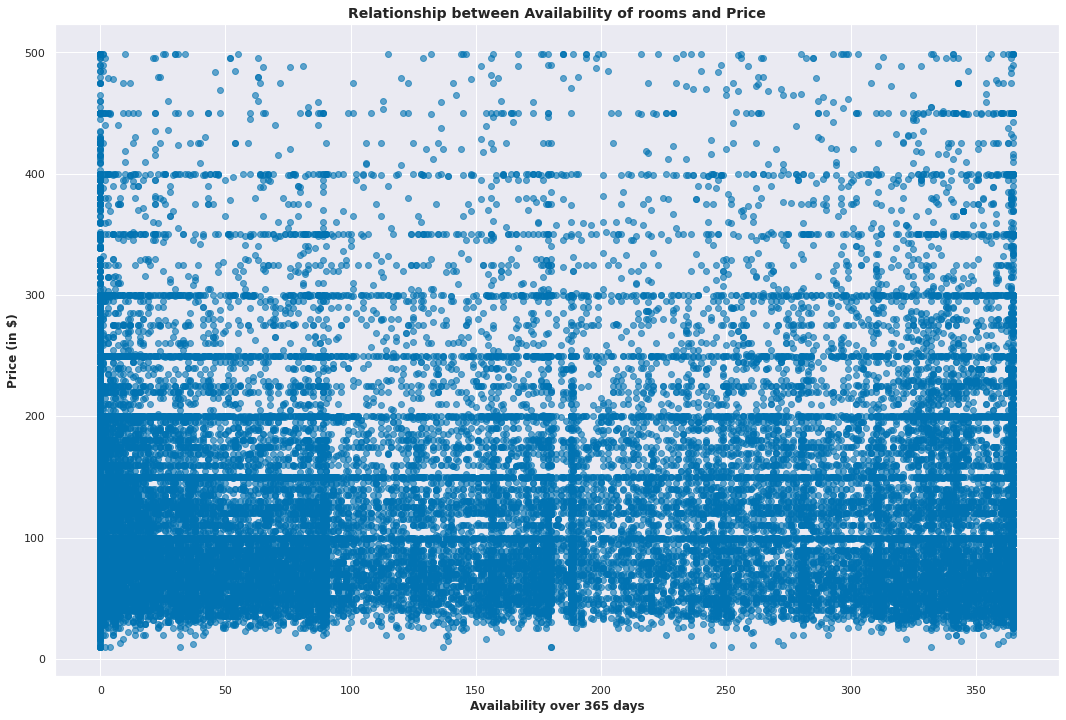

In [49]:
plt.figure(figsize = (18,12))
# Plotting the scatter plot
scatter = plt.scatter(scatter_data['availability_365'],
            scatter_data['price'],
            alpha = 0.6)
plt.title("Relationship between Availability of rooms and Price",
          fontsize = 14,
          weight = "bold")
plt.xlabel("Availability over 365 days", weight = "bold")
plt.ylabel("Price (in $)", weight = "bold")
plt.show();

#####Why scatter plot?

Scatter plots help us see the exact relationship between two variables.

#####Insight from the plot?

There exists no relation between the price and the availability of a listing.

#####How does the insight help?

We can tell that price does not decide whether a listing will be popular among the users or not. It may be one of the reasons but not the only. And, of course, there are going to be exceptions given how hosts may offer promotional discounts.

####4.13 How does the availability of the rooms vary in the three room types for each neighbourhood group?

In [50]:
# Preparing the dataset
bar_data = df.groupby(['neighbourhood_group', 'room_type'], as_index=False)['availability_365'].median()
bar_data

,neighbourhood_group,room_type,availability_365
0,Bronx,Entire home/apt,131.0
1,Bronx,Private room,157.0
2,Bronx,Shared room,89.0
3,Brooklyn,Entire home/apt,28.0
4,Brooklyn,Private room,24.0
5,Brooklyn,Shared room,156.0
6,Manhattan,Entire home/apt,42.0
7,Manhattan,Private room,29.0
8,Manhattan,Shared room,81.0
9,Queens,Entire home/apt,89.0


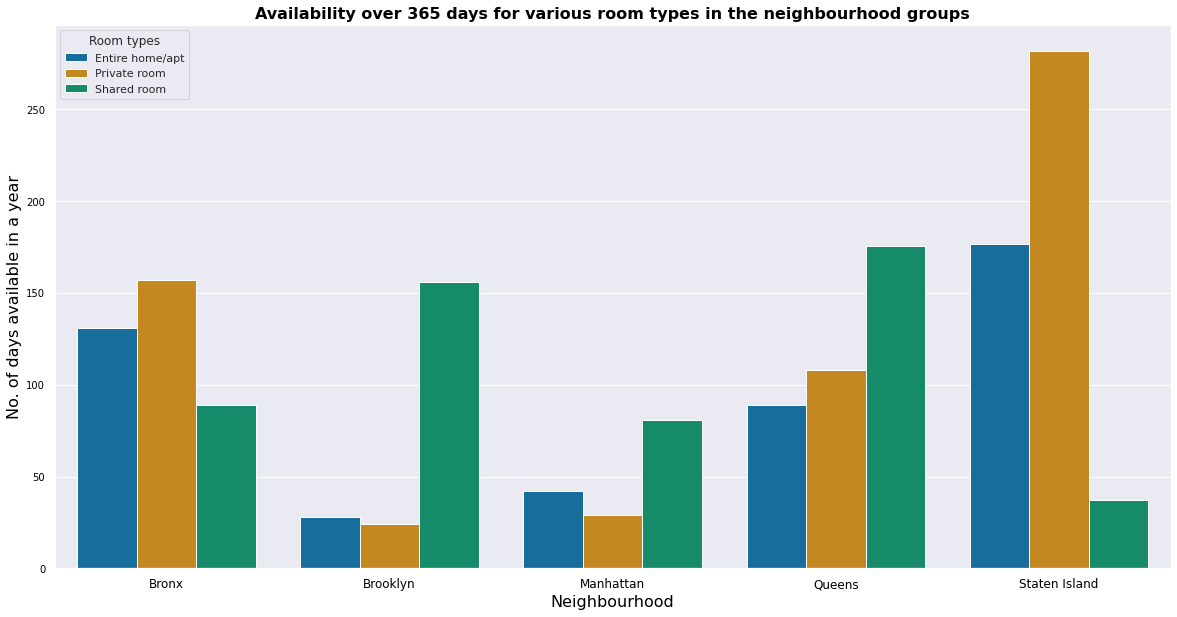

In [51]:
# Plotting the bar multivariate graph
sns.set_palette('colorblind')
plt.figure(figsize=(20,10))
sns.barplot(data=bar_data, x='neighbourhood_group', y ='availability_365', hue='room_type')
# Title for the graph
plt.title("Availability over 365 days for various room types in the neighbourhood groups", fontsize=16, color="black", fontweight="bold")
# The markings on the axes
plt.xticks(fontsize=12, color="black")
plt.yticks(fontsize=10, color="black")
# Labels for the axes
plt.ylabel("No. of days available in a year", fontsize=16, color="black")
plt.xlabel("Neighbourhood", fontsize=16, color="black")
plt.legend(title="Room types")
plt.show();

#####Why bar plot?

Bar plots helps us understand two categorical and a numerical variable together in one of the most simplest way.

#####Insights from the plot?

Private rooms and entire home/apt are available for lesser than 50 days on average in Brooklyn and Manhattan. Hence, the places with more listings prefer entire rooms or a private room over shared rooms.

Shared rooms are the busiest of all the room types in Staten Island and have some of the lowest availability rate in New York.

#####How does the insight help?

Looking at the insights we know which room types are available more or less in the different neighbourhood groups.


####4.14 How does the number of reviews vary per room type in every neighbourhood?

In [52]:
# Preparing the dataset
bar_data = df.groupby(['neighbourhood_group', 'room_type'], as_index=False)['reviews_per_month'].median()
bar_data

,neighbourhood_group,room_type,reviews_per_month
0,Bronx,Entire home/apt,1.190
1,Bronx,Private room,0.775
2,Bronx,Shared room,0.500
3,Brooklyn,Entire home/apt,0.440
4,Brooklyn,Private room,0.320
5,Brooklyn,Shared room,0.260
6,Manhattan,Entire home/apt,0.250
7,Manhattan,Private room,0.380
8,Manhattan,Shared room,0.530
9,Queens,Entire home/apt,0.880


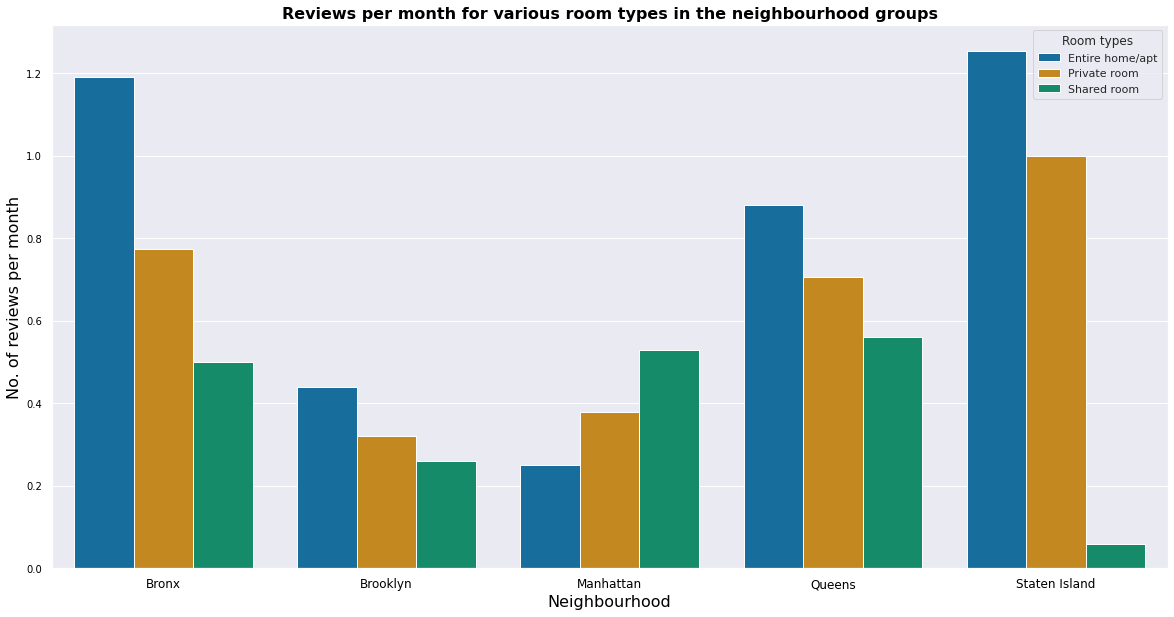

In [53]:
# Plotting the bar multivariate graph
sns.set_palette('colorblind')
plt.figure(figsize=(20,10))
sns.barplot(data=bar_data, x='neighbourhood_group', y ='reviews_per_month', hue='room_type')
# Title for the graph
plt.title("Reviews per month for various room types in the neighbourhood groups", fontsize=16, color="black", fontweight="bold")
# The markings on the axes
plt.xticks(fontsize=12, color="black")
plt.yticks(fontsize=10, color="black")
# Labels for the axes
plt.ylabel("No. of reviews per month", fontsize=16, color="black")
plt.xlabel("Neighbourhood", fontsize=16, color="black")
plt.legend(title="Room types")
plt.show();

#####Why bar chart?

Bar chart, as explained many times before, is the easiest one to represent the data and understand what it says when such multivariate analysis is to be done.

#####Insights from the chart?

Manhattan has users writing reviews for the shared and private rooms more than entire rooms, a trend not common with the other neighbourhood groups.

Staten Islands has the highest reviews rate (for entire room/apt) and the lowest reviews rate (for shared rooms) of all the data we have for the listings in the five neighbourhood groups.

Even though there's very little difference between the number of entire room and private room listings, there is a considerable difference in the number of reviews the two get for the neighbourhood groups.

######How does the insight help?


The insights for Staten Island, not just for the current viz, but for all the previous ones as well should be taken with a pinch of salt. It is because the difference is very large and the sample size for the smaller ones (Staten Island and Bronx) is very little to make educated learnings from the visualisations.

Also, it should be a point of interest why Manhattan has users reviewing the shared and private rooms more than the entire rooms. More data should be collected and analysed to understand what are driving the reviews and if they are positive or not.

####4.15 How does the density of the listings vary for each neighbourhood group?

In [54]:
scatter_data = df[['latitude','longitude','neighbourhood_group']]
scatter_data

,latitude,longitude,neighbourhood_group
0,40.64749,-73.97237,Brooklyn
1,40.75362,-73.98377,Manhattan
2,40.80902,-73.94190,Manhattan
3,40.68514,-73.95976,Brooklyn
4,40.79851,-73.94399,Manhattan
...,...,...,...
48890,40.67853,-73.94995,Brooklyn
48891,40.70184,-73.93317,Brooklyn
48892,40.81475,-73.94867,Manhattan
48893,40.75751,-73.99112,Manhattan


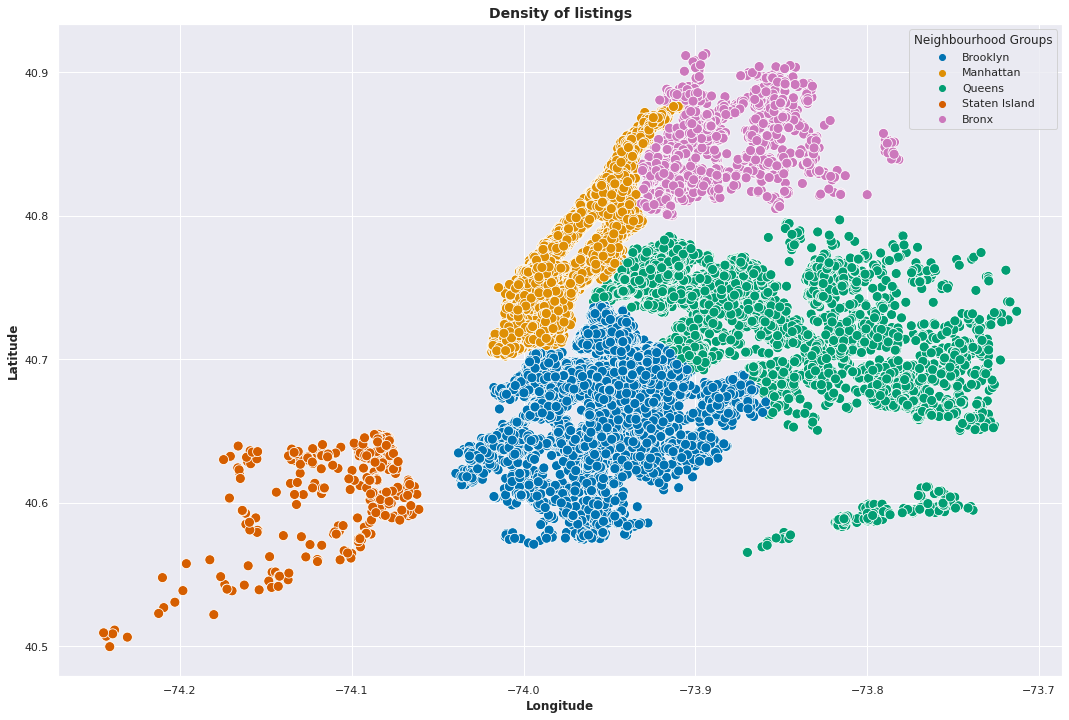

In [55]:
plt.figure(figsize = (18,12))
sns.scatterplot(scatter_data['longitude'],
                scatter_data['latitude'],
                hue = scatter_data['neighbourhood_group'],
                palette = 'colorblind',
                s = 100)
plt.title("Density of listings",
          fontsize = 14,
          weight = "bold")
plt.legend(title='Neighbourhood Groups')
plt.xlabel("Longitude", weight = "bold")
plt.ylabel("Latitude", weight = "bold")
plt.show();

#####Why scatter plot?

The density of the listings based on latitude and longitude could be best explained only by scatter as it forms a map-like figure through the scatter points.

#####Insights from the scatter plot?

Staten Island has the least density of the listings whereas places like Manhattan and Brooklyn are densely populated.

#####How does the insight help us?

We know that the places in Manhattan and near it have the highest density of listings. That seems to be the most popular areas thus for users. 

## ***5. Advices and suggestions to AirBnb:***



From our EDA, we have the following advices/suggestions for the stakeholders:

*   Increase foothold in Staten Island and Bronx.
* Try to get data to understand what makes users of Manhattan prefer entire home/apt over private rooms, unlike other neighbourhood groups.
*   Incentivize users to review listings.
* Investigate and if needed incentivize hosting shared rooms.
* Marketing campaigns to create awareness about affordability and availability of shared rooms.
* More data should be collected and analysed to understand what are driving the reviews and if they are positive or not.



# **Conclusion:**



*   Manhattan and the places nearby are densely populated. It is the most 
popular neighbourhood.
*   Manhattan and Brooklyn comprise almost 85% of the listings of New York on AirBnb. Whereas Bronx and Staten Island (the largest of the five neighbourhood groups) lack presence and account for only about 3% combined. 
* The most common types of rooms are apartments or homes fully available whereas the least common type is the shared room.
* More than 75% of the rooms for the private and shared ones cost lesser than $100 whereas the price doubles at the 75th percentile for entire rooms and apartments.
* There are more listings of entire home/apt in Manhattan than private rooms. A trend uncommon among the other neighbourhood groups.
* Generally, shared and private rooms are reviewed more frequently than entire house/apt room type.
* Shared rooms are more available (90 days) whereas entire homes or apartments and private rooms have almost similar availability (42-45 days).
* Booking entire home/apartment doesn't only need more money but a committment of more days as well.
* There is no relation between the price and the number of reviews of a listing.
* Manhattan is so expensive that getting a private room there is as expensive as getting an entire home/apt in Staten Island and Bronx.
* The price of getting a private room is almost same for all the neighbourhood groups but Manhattan.
* Price does not decide whether a listing will be popular among the users or not. 
* Private rooms and entire home/apt are available for lesser than 50 days on average in Brooklyn and Manhattan.
* Manhattan has users writing reviews for the shared and private rooms more than entire rooms, a trend not common with the other neighbourhood groups.

